Импортируем необходимые библиотеки

In [46]:
# Импортируем библиотеку pandas для работы с табличными данными
import pandas as pd
# Импортируем библиотеку numpy для работы с массивами данных
import numpy as np
# Импортируем библиотеку matplotlib.pyplot для построения графиков
import matplotlib.pyplot as plt
# Импортируем библиотеку seaborn для более красивых графиков
import seaborn as sns
# Импортируем модуль os для работы с файловой системой
import os
# Импортируем модуль json для сохранения метрик и параметров в читаемом формате
import json
# Импортируем модуль joblib для сохранения обученных моделей
import joblib

Импортируем необходимые функции

In [47]:
from sklearn.model_selection import train_test_split # для разделения данных на train/test
from sklearn.model_selection import GridSearchCV # для перебора гиперпараметров с кросс-валидацией
from sklearn.model_selection import cross_val_score # для оценки модели с кросс-валидацией
from sklearn.preprocessing import StandardScaler # для нормализации признаков (масштабирование)
from sklearn.pipeline import Pipeline # для объединения предобработки и модели в один объект
from sklearn.linear_model import LogisticRegression # для логистической регрессии (базовая модель)
from sklearn.dummy import DummyClassifier # для создания наивных моделей (baseline)
from sklearn.tree import DecisionTreeClassifier # для дерева решений
from sklearn.ensemble import RandomForestClassifier # для случайного леса
from sklearn.ensemble import AdaBoostClassifier # для AdaBoost (один из методов бустинга)
from sklearn.ensemble import GradientBoostingClassifier # для градиентного бустинга
from sklearn.ensemble import StackingClassifier # для стекинга моделей
from sklearn.metrics import accuracy_score # для вычисления точности
from sklearn.metrics import f1_score # для вычисления F1-меры
from sklearn.metrics import roc_auc_score # для вычисления ROC-AUC
from sklearn.metrics import confusion_matrix # Для вычисления матрицы ошибок
from sklearn.metrics import roc_curve # для вычисления точек ROC-кривой
from sklearn.metrics import precision_recall_curve # Для вычисления точек Precision-Recall кривой
from sklearn.inspection import permutation_importance # для вычисления важности признаков
 

Создаем необходимые директории

In [48]:
os.makedirs("artifacts", exist_ok=True)
os.makedirs("artifacts/figures", exist_ok=True)

Загружаем датасет

In [49]:
dataset_path=os.path.abspath(os.path.join("..","..","dataset","S06-hw-dataset-04.csv"))
print (dataset_path)
df = pd.read_csv(dataset_path)

c:\Users\Юля\Desktop\ИИИ\Gorbacheva_Julia_III\dataset\S06-hw-dataset-04.csv


Выводим распределение таргета

In [50]:
print("Распределение таргета:")
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))

Распределение таргета:
target
0    23770
1     1230
Name: count, dtype: int64
target
0    0.9508
1    0.0492
Name: proportion, dtype: float64


Выводим первые 5 строк датасета

In [6]:
print("Первые 5 строк датасета:")
print(df.head())

Первые 5 строк датасета:
   id       f01       f02       f03       f04       f05       f06       f07  \
0   1 -1.250210  1.423474 -0.225004 -4.023138 -0.832729 -0.550874  1.772090   
1   2  0.074328  0.376429  0.212831 -0.502074  2.017405  0.625496  1.943785   
2   3  0.638481  0.060968  0.746760  2.479653 -0.292858 -0.078139 -2.918423   
3   4  1.712916 -1.350969 -0.256473  1.622074 -0.445141  0.911932 -3.440345   
4   5  0.905676 -0.206545 -0.068806  4.086026 -1.010045 -0.772644 -4.207688   

        f08       f09  ...        f52        f53       f54       f55  \
0  2.761690 -0.698750  ...  10.938269   0.501178  1.600001  0.314212   
1  1.242030 -0.524090  ...   7.775262  -4.550195  6.272586 -0.932162   
2 -0.013186  1.009135  ...  -4.448447  -9.593179 -3.093519  0.029321   
3  1.505192 -1.104348  ...  -1.619072  -3.237479 -5.474038 -1.582475   
4  2.506104  1.589143  ...  -2.396844 -10.540129 -5.532811 -1.231203   

        f56       f57       f58       f59       f60  target  
0  1.

Выводим информацию о столбцах и типах

In [7]:
print("Информация о датасете (типы данных и количество ненулевых значений):")
print(df.info())

Информация о датасете (типы данных и количество ненулевых значений):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      25000 non-null  int64  
 1   f01     25000 non-null  float64
 2   f02     25000 non-null  float64
 3   f03     25000 non-null  float64
 4   f04     25000 non-null  float64
 5   f05     25000 non-null  float64
 6   f06     25000 non-null  float64
 7   f07     25000 non-null  float64
 8   f08     25000 non-null  float64
 9   f09     25000 non-null  float64
 10  f10     25000 non-null  float64
 11  f11     25000 non-null  float64
 12  f12     25000 non-null  float64
 13  f13     25000 non-null  float64
 14  f14     25000 non-null  float64
 15  f15     25000 non-null  float64
 16  f16     25000 non-null  float64
 17  f17     25000 non-null  float64
 18  f18     25000 non-null  float64
 19  f19     25000 non-null  float64
 20  f20

Выводим базовые описательные статистики для числовых столбцов

In [8]:
print("Описательные статистики для числовых признаков:")
print(df.describe())

Описательные статистики для числовых признаков:
                 id           f01           f02           f03           f04  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean   12500.500000     -0.000386     -0.004872      0.003202      0.335329   
std     7217.022701      1.001623      0.995606      1.004367      3.207537   
min        1.000000     -4.370993     -4.087073     -4.103875    -13.249937   
25%     6250.750000     -0.680165     -0.675100     -0.675426     -1.750048   
50%    12500.500000      0.001859     -0.000247      0.013272      0.403483   
75%    18750.250000      0.679702      0.659523      0.683437      2.486453   
max    25000.000000      4.208888      3.984564      3.793442     15.288250   

                f05           f06           f07           f08           f09  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean      -0.000563     -0.010118      0.001182      0.957385     -0.004658   
std

Выделяем матрицу признаков `X` и вектор таргета `y`

In [9]:
# X - все колонки кроме 'target', т.е. признаки
X = df.drop('target', axis=1)
# y - только колонка 'target', т.е. целевая переменная
y = df['target']
print(f"Размерности: X={X.shape}, y={y.shape}")

Размерности: X=(25000, 61), y=(25000,)


Разделяем данные на train и test

In [10]:
# train_test_split разделяет данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                        # признаки и целевая переменная
    test_size=0.25,             # доля тестовой выборки (25%)
    random_state=42,            # фиксация генератора случайных чисел
    stratify=y                  # стратификация по целевой переменной
)

Выводим размерности после разделения

In [11]:
print(f"Размерности после сплита:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"\nДоли классов в train: {y_train.value_counts(normalize=True).values}")
print(f"Доли классов в test: {y_test.value_counts(normalize=True).values}")

Размерности после сплита:
X_train: (18750, 61), y_train: (18750,)
X_test: (6250, 61), y_test: (6250,)

Доли классов в train: [0.95077333 0.04922667]
Доли классов в test: [0.95088 0.04912]


Выводим пояснния важности фиксированного seed и стратификации

In [12]:
print("Пояснение:")
print("\nФиксированный seed (random_state=42) важен для воспроизводимости результатов -")
print("при каждом запуске данные будут разделены одинаково, что позволяет сравнивать")
print("модели на одинаковых данных и избегать случайных отклонений.")
print("\nСтратификация (stratify=y) важна для сохранения пропорций классов в train и test,")
print("что обеспечивает репрезентативность обеих выборок и корректную оценку качества.")

Пояснение:

Фиксированный seed (random_state=42) важен для воспроизводимости результатов -
при каждом запуске данные будут разделены одинаково, что позволяет сравнивать
модели на одинаковых данных и избегать случайных отклонений.

Стратификация (stratify=y) важна для сохранения пропорций классов в train и test,
что обеспечивает репрезентативность обеих выборок и корректную оценку качества.


Создаем baseline модели

In [ ]:
# DummyClassifier - наивная модель для baseline
# strategy='most_frequent' - предсказывает самый частый класс из обучающей выборки
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)
# Обучаем dummy модель на обучающих данных
dummy_model.fit(X_train, y_train)
# Делаем предсказания на тестовой выборке
dummy_pred = dummy_model.predict(X_test)

# LogisticRegression через Pipeline
# Pipeline объединяет предобработку и модель в один объект
# StandardScaler нормализует признаки (масштабирует к среднему 0 и std 1)
# LogisticRegression обучает логистическую регрессию
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # шаг 1: нормализация признаков
    ('lr', LogisticRegression(random_state=42, max_iter=1000))  # шаг 2: логистическая регрессия
])
# Обучаем pipeline на обучающих данных
lr_pipeline.fit(X_train, y_train)
# Делаем предсказания на тестовой выборке
lr_pred = lr_pipeline.predict(X_test)
# Получаем вероятности для ROC-AUC
lr_pred_proba = lr_pipeline.predict_proba(X_test)[:, 1]

Функция для вычисления метрик

In [14]:
def calculate_metrics(y_true, y_pred, y_pred_proba=None):
    # Вычисляем accuracy (доля правильных ответов)
    accuracy = accuracy_score(y_true, y_pred)
    # Вычисляем F1-меру (гармоническое среднее precision и recall)
    f1 = f1_score(y_true, y_pred)
    # Словарь с основными метриками
    metrics = {
        'accuracy': accuracy,
        'f1': f1
    }
    # Если переданы вероятности, вычисляем ROC-AUC
    if y_pred_proba is not None:
        try:
            # ROC-AUC - площадь под ROC-кривой
            roc_auc = roc_auc_score(y_true, y_pred_proba)
            metrics['roc_auc'] = roc_auc
        except:
            # Если не удается вычислить ROC-AUC, возвращаем NaN
            metrics['roc_auc'] = np.nan
    return metrics

Вычисляем метрики для обоих baseline'ов

In [15]:
dummy_metrics = calculate_metrics(y_test, dummy_pred)
lr_metrics = calculate_metrics(y_test, lr_pred, lr_pred_proba)
print("Метрики DummyClassifier (most_frequent):")
print(dummy_metrics)
print("\nМетрики LogisticRegression (Pipeline):")
print(lr_metrics)

Метрики DummyClassifier (most_frequent):


{'accuracy': 0.95088, 'f1': 0.0}

Метрики LogisticRegression (Pipeline):
{'accuracy': 0.96272, 'f1': 0.41309823677581864, 'roc_auc': 0.8397035682633224}


Краткая интерпретация

In [16]:
print("DummyClassifier (most_frequent):")
print("- Предсказывает только один класс (наиболее частый)")
print("- Accuracy близка к доле самого частого класса в данных")
print("- F1 и ROC-AUC показывают минимальный уровень производительности")
print("- Используется как нижняя граница качества")
print("\nLogisticRegression (Pipeline):")
print("- Использует нормализацию признаков для лучшей сходимости")
print("- Учитывает все признаки для принятия решения")
print("- Показывает более реалистичный baseline по сравнению с Dummy")
print("- ROC-AUC показывает способность модели различать классы")

DummyClassifier (most_frequent):
- Предсказывает только один класс (наиболее частый)
- Accuracy близка к доле самого частого класса в данных
- F1 и ROC-AUC показывают минимальный уровень производительности
- Используется как нижняя граница качества

LogisticRegression (Pipeline):
- Использует нормализацию признаков для лучшей сходимости
- Учитывает все признаки для принятия решения
- Показывает более реалистичный baseline по сравнению с Dummy
- ROC-AUC показывает способность модели различать классы


DecisionTreeClassifier с контролем сложности

In [ ]:
print("DecisionTreeClassifier с контролем сложности:")
# Определяем параметры для перебора в GridSearchCV
dt_params = {
    'max_depth': [5, 7, 10, 15],        # 5-15 уровней для 2500 образцов
    'min_samples_leaf': [25, 50, 100],  # 1-4% от данных (25-100 из 2500)
}
# Создаем GridSearchCV - объект для перебора гиперпараметров с кросс-валидацией
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),  # базовая модель (дерево решений)
    dt_params,                                # параметры для перебора
    cv=5,                                     # 5-фолдная кросс-валидация (разбиваем train на 5 частей)
    scoring='roc_auc',                        # метрика для оптимизации (ROC-AUC)
    n_jobs=-1                                 # использовать все ядра процессора (-1 = все ядра)
)
# Обучаем GridSearchCV на обучающих данных
# Он перебирает все комбинации параметров и выбирает лучшую по CV-оценке
dt_grid.fit(X_train, y_train)
# Получаем лучшую модель (с оптимальными параметрами)
dt_best = dt_grid.best_estimator_
# Делаем предсказания на тестовой выборке
dt_pred = dt_best.predict(X_test)
# Получаем вероятности для ROC-AUC (второй столбец - вероятность класса 1)
dt_pred_proba = dt_best.predict_proba(X_test)[:, 1]
# Вычисляем метрики на тестовой выборке
dt_accuracy = accuracy_score(y_test, dt_pred)      # доля правильных ответов
dt_f1 = f1_score(y_test, dt_pred)                  # гармоническое среднее precision и recall
dt_roc_auc = roc_auc_score(y_test, dt_pred_proba)  # площадь под ROC-кривой
# Выводим результаты для дерева решений
print(f"Decision Tree - лучшие параметры: {dt_grid.best_params_}")
print(f"Decision Tree - accuracy: {dt_accuracy:.3f}, f1: {dt_f1:.3f}, roc_auc: {dt_roc_auc:.3f}")

1. DecisionTreeClassifier с контролем сложности:
Decision Tree - лучшие параметры: {'max_depth': 15, 'min_samples_leaf': 100}
Decision Tree - accuracy: 0.962, f1: 0.486, roc_auc: 0.832


RandomForestClassifier с "лесными" ручками

In [ ]:
print("RandomForestClassifier с контролем сложности:")
# Параметры для случайного леса
rf_params = {
    'n_estimators': [50, 100, 200],        # 50-200 деревьев для стабильности
    'max_depth': [5, 10, 15],             # 5-15 уровней (может быть глубже чем дерево)
    'min_samples_leaf': [5, 10, 20],      # 0.5-2% от данных (меньше чем для одного дерева)
    'max_features': ['sqrt', 'log2', 0.8] # sqrt - стандарт для лесов
}
# Создаем GridSearchCV для случайного леса
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),  # базовая модель (случайный лес)
    rf_params,                                # параметры для перебора
    cv=5,                                     # 5-фолдная кросс-валидация
    scoring='roc_auc',                        # метрика для оптимизации
    n_jobs=-1                                 # использовать все ядра процессора
)
# Обучаем GridSearchCV на обучающих данных
rf_grid.fit(X_train, y_train)
# Получаем лучшую модель случайного леса
rf_best = rf_grid.best_estimator_
# Делаем предсказания на тестовой выборке
rf_pred = rf_best.predict(X_test)
rf_pred_proba = rf_best.predict_proba(X_test)[:, 1]
# Вычисляем метрики для случайного леса
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
# Выводим результаты для случайного леса
print(f"Random Forest - лучшие параметры: {rf_grid.best_params_}")
print(f"Random Forest - accuracy: {rf_accuracy:.3f}, f1: {rf_f1:.3f}, roc_auc: {rf_roc_auc:.3f}")

2. RandomForestClassifier с контролем сложности:
Random Forest - лучшие параметры: {'max_depth': 15, 'max_features': 0.8, 'min_samples_leaf': 5, 'n_estimators': 100}
Random Forest - accuracy: 0.973, f1: 0.633, roc_auc: 0.899


GradientBoostingClassifier (один из boosting'ов на выбор)

In [ ]:
print("GradientBoostingClassifier:")
# Параметры для градиентного бустинга
gb_params = {
    'n_estimators': [100, 200],             # 100-200 деревьев для 2500 образцов
    'max_depth': [4, 6, 8],                 # 4-8 уровней (мелкие деревья)
    'learning_rate': [0.05, 0.1, 0.15],    # 0.05-0.1 для стабильности
    'min_samples_leaf': [25, 50]            # 1-2% от данных
}
# Создаем GridSearchCV для градиентного бустинга
gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),  # базовая модель (градиентный бустинг)
    gb_params,                                    # параметры для перебора
    cv=5,                                         # 5-фолдная кросс-валидация
    scoring='roc_auc',                            # метрика для оптимизации
    n_jobs=-1                                     # использовать все ядра процессора
)
# Обучаем GridSearchCV на обучающих данных
gb_grid.fit(X_train, y_train)
# Получаем лучшую модель градиентного бустинга
gb_best = gb_grid.best_estimator_
# Делаем предсказания на тестовой выборке
gb_pred = gb_best.predict(X_test)
gb_pred_proba = gb_best.predict_proba(X_test)[:, 1]
# Вычисляем метрики для градиентного бустинга
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
# Выводим результаты для градиентного бустинга
print(f"Gradient Boosting - лучшие параметры: {gb_grid.best_params_}")
print(f"Gradient Boosting - accuracy: {gb_accuracy:.3f}, f1: {gb_f1:.3f}, roc_auc: {gb_roc_auc:.3f}")

3. GradientBoostingClassifier:
Gradient Boosting - лучшие параметры: {'learning_rate': 0.15, 'max_depth': 8, 'min_samples_leaf': 25, 'n_estimators': 200}
Gradient Boosting - accuracy: 0.980, f1: 0.754, roc_auc: 0.904


Сравниваем модели

In [20]:
# Создаем словарь с результатами всех моделей
models_comparison = {
    'Decision Tree': {'accuracy': dt_accuracy, 'f1': dt_f1, 'roc_auc': dt_roc_auc},
    'Random Forest': {'accuracy': rf_accuracy, 'f1': rf_f1, 'roc_auc': rf_roc_auc},
    'Gradient Boosting': {'accuracy': gb_accuracy, 'f1': gb_f1, 'roc_auc': gb_roc_auc},
}

# Выводим сравнение всех моделей
for model_name, metrics in models_comparison.items():
    print(f"{model_name}: accuracy={metrics['accuracy']:.3f}, f1={metrics['f1']:.3f}, roc_auc={metrics['roc_auc']:.3f}")

Decision Tree: accuracy=0.962, f1=0.486, roc_auc=0.832
Random Forest: accuracy=0.973, f1=0.633, roc_auc=0.899
Gradient Boosting: accuracy=0.980, f1=0.754, roc_auc=0.904


Создаем таблицу финальных метрик на test по всем моделям

In [60]:
print('Таблица финальных метрик на test по всем моделям')
results_table = f"""
| Model | Accuracy | F1 | ROC-AUC |
|-------|----------|----|---------|
| Dummy | {dummy_metrics['accuracy']:.3f} | {dummy_metrics['f1']:.3f} | {dummy_metrics.get('roc_auc', 0.5):.3f} |
| Logistic Regression | {lr_metrics['accuracy']:.3f} | {lr_metrics['f1']:.3f} | {lr_metrics['roc_auc']:.3f} |
| Decision Tree | {dt_accuracy:.3f} | {dt_f1:.3f} | {dt_roc_auc:.3f} |
| Random Forest | {rf_accuracy:.3f} | {rf_f1:.3f} | {rf_roc_auc:.3f} |
| Gradient Boosting | {gb_accuracy:.3f} | {gb_f1:.3f} | {gb_roc_auc:.3f} |
"""
print(results_table)

Таблица финальных метрик на test по всем моделям

| Model | Accuracy | F1 | ROC-AUC |
|-------|----------|----|---------|
| Dummy | 0.951 | 0.000 | 0.500 |
| Logistic Regression | 0.963 | 0.413 | 0.840 |
| Decision Tree | 0.962 | 0.486 | 0.832 |
| Random Forest | 0.973 | 0.633 | 0.899 |
| Gradient Boosting | 0.980 | 0.754 | 0.904 |



Строим диагностические графики


1. ROC-кривая (для бинарных задач):
2. Confusion Matrix:
3. Сравнение метрик:
4. Precision-Recall кривая (по желанию для дисбаланса, особенно dataset-04):


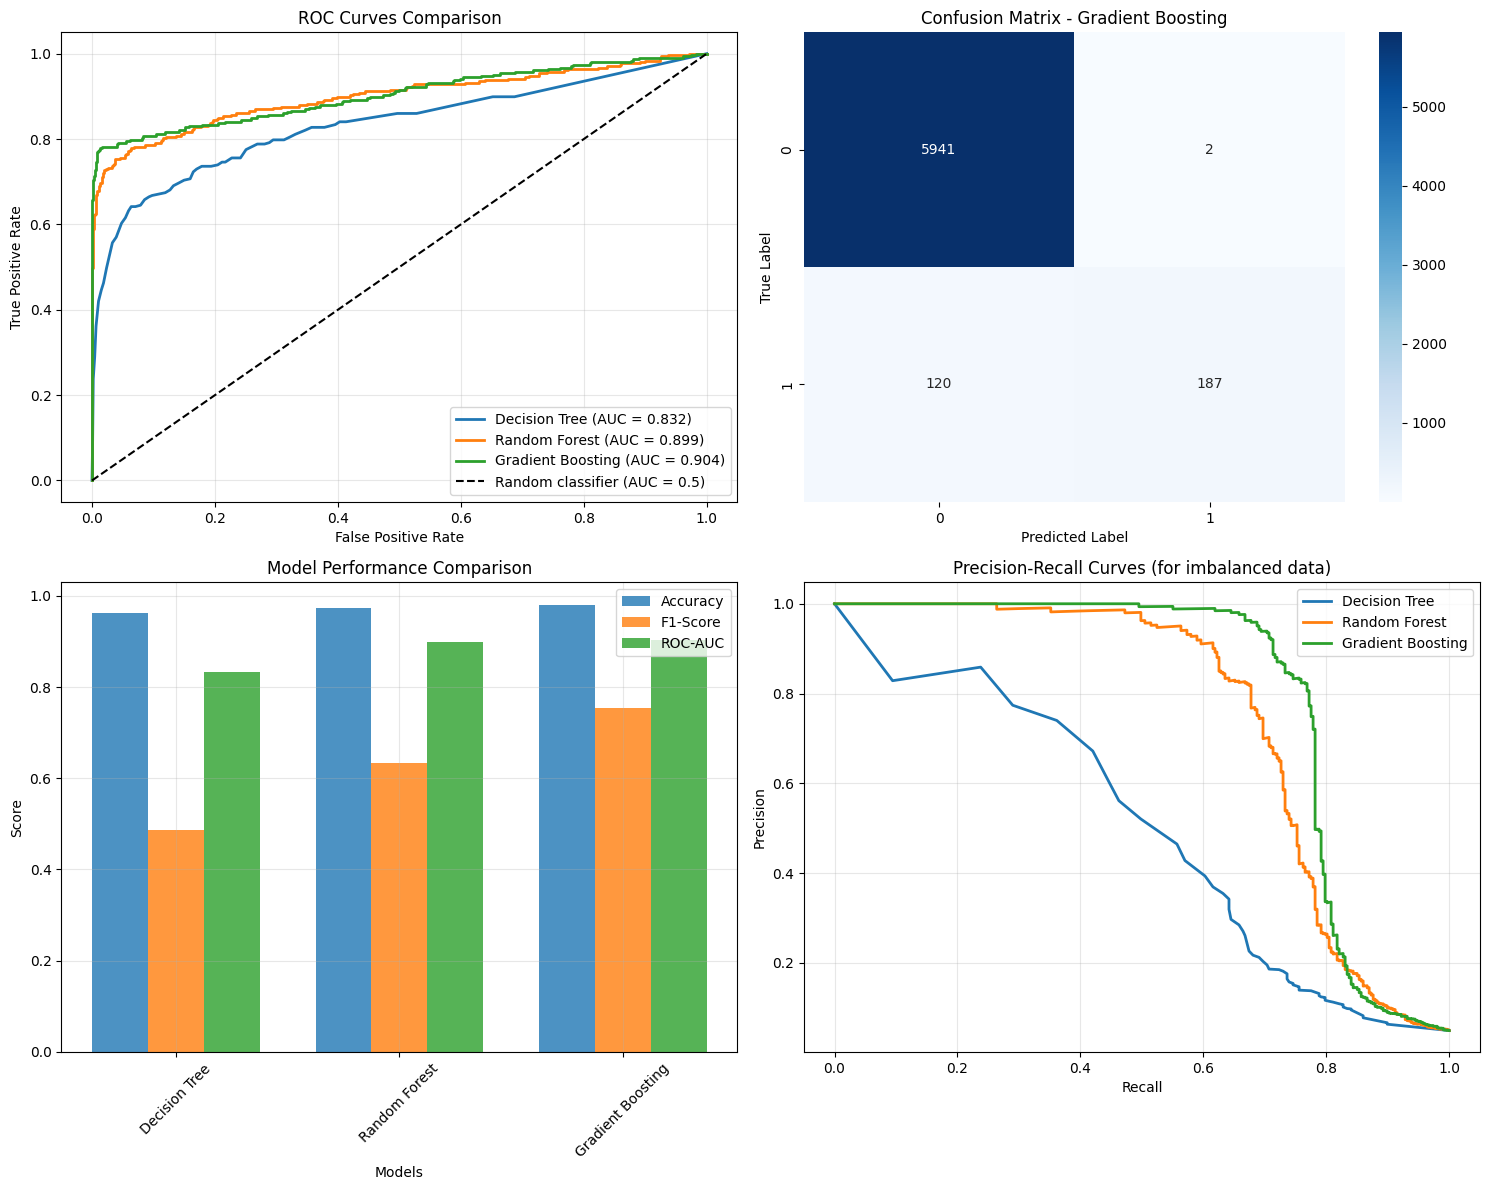

In [ ]:
# Создаем фигуру с 2x2 подграфиками
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# ROC-кривая (для бинарных задач)
print("\n1. ROC-кривая (для бинарных задач):")
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_pred_proba)
axes[0, 0].plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.3f})', linewidth=2)
axes[0, 0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.3f})', linewidth=2)
axes[0, 0].plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_roc_auc:.3f})', linewidth=2)
axes[0, 0].plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curves Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
# Confusion Matrix для лучшей модели
print("2. Confusion Matrix:")
best_model_idx = np.argmax([dt_roc_auc, rf_roc_auc, gb_roc_auc])
best_model_name = ['Decision Tree', 'Random Forest', 'Gradient Boosting'][best_model_idx]
best_model_pred = [dt_pred, rf_pred, gb_pred][best_model_idx]
cm = confusion_matrix(y_test, best_model_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title(f'Confusion Matrix - {best_model_name}')
axes[0, 1].set_ylabel('True Label')
axes[0, 1].set_xlabel('Predicted Label')
# Сравнение всех метрик
print("3. Сравнение метрик:")
models_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracies = [dt_accuracy, rf_accuracy, gb_accuracy]
f1_scores = [dt_f1, rf_f1, gb_f1]
roc_aucs = [dt_roc_auc, rf_roc_auc, gb_roc_auc]
x = np.arange(len(models_names))
width = 0.25
axes[1, 0].bar(x - width, accuracies, width, label='Accuracy', alpha=0.8)
axes[1, 0].bar(x, f1_scores, width, label='F1-Score', alpha=0.8)
axes[1, 0].bar(x + width, roc_aucs, width, label='ROC-AUC', alpha=0.8)
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Model Performance Comparison')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models_names, rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
# Precision-Recall кривая (по желанию для дисбаланса, особенно dataset-04)
print("4. Precision-Recall кривая:")
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_pred_proba)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_pred_proba)
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_pred_proba)
axes[1, 1].plot(recall_dt, precision_dt, label='Decision Tree', linewidth=2)
axes[1, 1].plot(recall_rf, precision_rf, label='Random Forest', linewidth=2)
axes[1, 1].plot(recall_gb, precision_gb, label='Gradient Boosting', linewidth=2)
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].set_title('Precision-Recall Curves (for imbalanced data)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('artifacts/figures/roc_and_confusion.png', dpi=300, bbox_inches='tight')
plt.show()


Определяем лучшую модель по согласованному критерию

In [ ]:
# Определение лучшей модели по согласованному критерию (ROC-AUC для бинарных задач)
best_model_idx = np.argmax([dt_roc_auc, rf_roc_auc, gb_roc_auc])
best_model_name = ['Decision Tree', 'Random Forest', 'Gradient Boosting'][best_model_idx]
print(f"Лучшая модель по ROC-AUC: {best_model_name}")
# В зависимости от лучшей модели, получаем соответствующую модель для интерпретации
if best_model_name == 'Decision Tree':
    best_model = dt_best
elif best_model_name == 'Random Forest':
    best_model = rf_best
elif best_model_name == 'Gradient Boosting':
    best_model = gb_best
print(f"Тип лучшей модели: {type(best_model)}")

Лучшая модель по ROC-AUC: Gradient Boosting
Тип лучшей модели: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


Проводим эксперимент `RandomForestClassifier` с различными `random_state` 

In [63]:
results = []
for rs in [42, 100, 200, 300, 400]:  # 5 разных random_state
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=rs, stratify=y)
    model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42) # random_state=42 для модели
    model.fit(X_tr, y_tr)
    pred_proba = model.predict_proba(X_te)[:, 1]
    auc = roc_auc_score(y_te, pred_proba)
    results.append(auc)

print(results)
print(f"std = {np.std(results):.3f}")

[0.870125628054766, 0.847941912843613, 0.8621002938047891, 0.8687044884752592, 0.8537273703616296]
std = 0.009


Проводим эксперимент `DecisionTreeClassifier` с различными `random_state` 

In [ ]:
results = []
for rs in [42, 100, 200, 300, 400]:  # 5 разных random_state
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=rs, stratify=y)
    model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, random_state=42) # random_state=42 для модели
    model.fit(X_tr, y_tr)
    pred_proba = model.predict_proba(X_te)[:, 1]
    auc = roc_auc_score(y_te, pred_proba)
    results.append(auc)
print(results)
print(f"std = {np.std(results):.3f}")

[0.788725198463596, 0.7235532935893095, 0.773344911088993, 0.7800705268306364, 0.752000454901478]
std = 0.023


Вычисляем top-10 признаков

In [31]:
perm_importance = permutation_importance(
    best_model,    # лучшая модель
    X_test,        # тестовые признаки
    y_test,        # истинные значения
    n_repeats=10,  # количество повторений для статистической значимости
    random_state=42 # фиксация для воспроизводимости
)
# Создаем DataFrame с важностью признаков
importance_df = pd.DataFrame({
    'feature': X.columns,                    # названия признаков
    'importance_mean': perm_importance.importances_mean,  # средняя важность
    'importance_std': perm_importance.importances_std     # стандартное отклонение важности
}).sort_values('importance_mean', ascending=False)  # сортируем по убыванию важности
print("Топ-10 важных признаков (permutation importance):")
print(importance_df.head(10))


Топ-10 важных признаков (permutation importance):
   feature  importance_mean  importance_std
58     f58         0.011168        0.001135
25     f25         0.008960        0.000644
53     f53         0.008384        0.000657
38     f38         0.006160        0.000969
47     f47         0.004688        0.000577
54     f54         0.003776        0.000608
13     f13         0.003408        0.000496
4      f04         0.002752        0.000783
33     f33         0.002624        0.000322
8      f08         0.002400        0.000590


Строим график важности признаков

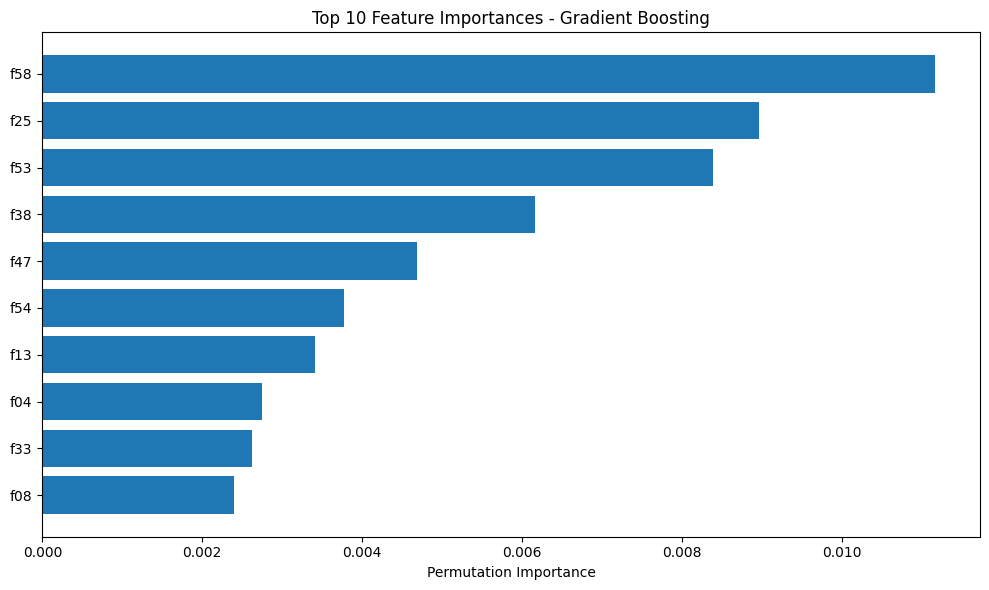

In [32]:
plt.figure(figsize=(10, 6))
top_features = importance_df.head(10)
plt.barh(range(len(top_features)), top_features['importance_mean'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Permutation Importance')
plt.title(f'Top 10 Feature Importances - {best_model_name}')
plt.gca().invert_yaxis()  # инвертируем ось Y (самые важные сверху)
plt.tight_layout()
plt.savefig('artifacts/figures/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

Краткая интерпретация

In [34]:
print(f"Лучшая модель: {best_model_name}")
print(f"Количество признаков: {len(X.columns)}")
print(f"Размер тестовой выборки: {len(y_test)}")
print("\nТоп-5 самых важных признаков:")
for i, (idx, row) in enumerate(importance_df.head(5).iterrows()):
    print(f"{i+1}. {row['feature']}: {row['importance_mean']:.4f} (std: {row['importance_std']:.4f})")
print("\nИнтерпретация результатов:")
print("- Признаки с высокой permutation importance наиболее важны для предсказаний модели")
print("- Значения permutation importance показывают, насколько ухудшится модель при перемешивании признака")
print("- Чем выше значение, тем больше влияние признака на качество модели")
print("- Стандартное отклонение показывает стабильность важности признака")
print("\nДля датасета с дисбалансом (dataset-04):")
print("- Важные признаки помогают модели различать редкие положительные примеры")
print("- Высокая важность признаков указывает на их способность различать классы")
print("- Наиболее важные признаки могут соответствовать ожиданиям по доменной области")
print("- Интерпретация важности признаков особенно важна для понимания модели в задачах fraud detection")
print("\nВыводы:")
print("- Перестановочная важность помогает понять, какие признаки действительно влияют на решения модели")
print("- Это полезно для отбора признаков и понимания работы модели")
print("- Важные признаки могут соответствовать ожиданиям по доменной области")

Лучшая модель: Gradient Boosting
Количество признаков: 61
Размер тестовой выборки: 6250

Топ-5 самых важных признаков:
1. f58: 0.0112 (std: 0.0011)
2. f25: 0.0090 (std: 0.0006)
3. f53: 0.0084 (std: 0.0007)
4. f38: 0.0062 (std: 0.0010)
5. f47: 0.0047 (std: 0.0006)

Интерпретация результатов:
- Признаки с высокой permutation importance наиболее важны для предсказаний модели
- Значения permutation importance показывают, насколько ухудшится модель при перемешивании признака
- Чем выше значение, тем больше влияние признака на качество модели
- Стандартное отклонение показывает стабильность важности признака

Для датасета с дисбалансом (dataset-04):
- Важные признаки помогают модели различать редкие положительные примеры
- Высокая важность признаков указывает на их способность различать классы
- Наиболее важные признаки могут соответствовать ожиданиям по доменной области
- Интерпретация важности признаков особенно важна для понимания модели в задачах fraud detection

Выводы:
- Перестановочна

Сохраняем финальные метрики на test по всем моделям

In [35]:
# Собираем метрики для всех моделей
metrics_dict = {
    'Dummy': {
        'accuracy': dummy_metrics['accuracy'], 
        'f1': dummy_metrics['f1'], 
        'roc_auc': dummy_metrics.get('roc_auc', 0.5)
    },
    'Logistic Regression': {
        'accuracy': lr_metrics['accuracy'], 
        'f1': lr_metrics['f1'], 
        'roc_auc': lr_metrics.get('roc_auc', 0.5)
    },
    'Decision Tree': {
        'accuracy': dt_accuracy, 
        'f1': dt_f1, 
        'roc_auc': dt_roc_auc
    },
    'Random Forest': {
        'accuracy': rf_accuracy, 
        'f1': rf_f1, 
        'roc_auc': rf_roc_auc
    },
    'Gradient Boosting': {
        'accuracy': gb_accuracy, 
        'f1': gb_f1, 
        'roc_auc': gb_roc_auc
    }
}
# Сохраняем в JSON файл
with open('artifacts/metrics_test.json', 'w') as f:
    json.dump(metrics_dict, f, indent=2)
print("metrics_test.json создан")


metrics_test.json создан


Сохраняем лучшие параметры и CV-score для моделей с подбором

In [37]:
search_summaries = {
    'DecisionTree': {
        'best_params': dt_grid.best_params_,      # лучшие параметры дерева
        'cv_score': float(dt_grid.best_score_)    # CV-оценка дерева
    },
    'RandomForest': {
        'best_params': rf_grid.best_params_,      # лучшие параметры леса
        'cv_score': float(rf_grid.best_score_)    # CV-оценка леса
    },
    'GradientBoosting': {
        'best_params': gb_grid.best_params_,      # лучшие параметры бустинга
        'cv_score': float(gb_grid.best_score_)    # CV-оценка бустинга
    }
}
# Сохраняем в JSON файл
with open('artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=2)
print("search_summaries.json создан")

search_summaries.json создан


Сохраняем лучшую модель

In [38]:
# Определяем лучшую модель по ROC-AUC
best_model_idx = np.argmax([dt_roc_auc, rf_roc_auc, gb_roc_auc])
best_model_name = ['Decision Tree', 'Random Forest', 'Gradient Boosting'][best_model_idx]
# В зависимости от лучшей модели, получаем соответствующую модель
if best_model_name == 'Decision Tree':
    best_model = dt_best
elif best_model_name == 'Random Forest':
    best_model = rf_best
elif best_model_name == 'Gradient Boosting':
    best_model = gb_best
# Сохраняем лучшую модель
joblib.dump(best_model, 'artifacts/best_model.joblib')
print("best_model.joblib создан")

best_model.joblib создан


Сохраняем метаданные лучшей модели

In [39]:
best_model_meta = {
    'model_name': best_model_name,              # название лучшей модели
    'model_type': str(type(best_model)),        # тип модели
    'test_metrics': {                           # метрики на тестовой выборке
        'accuracy': float([dt_accuracy, rf_accuracy, gb_accuracy][best_model_idx]),
        'f1': float([dt_f1, rf_f1, gb_f1][best_model_idx]),
        'roc_auc': float([dt_roc_auc, rf_roc_auc, gb_roc_auc][best_model_idx])
    }
}
# Сохраняем метаданные в JSON файл
with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(best_model_meta, f, indent=2)
print("best_model_meta.json создан")

best_model_meta.json создан


Проверяем наличие минимум 2 изображений

In [42]:
# Проверяем, что директория figures существует
figures_dir = 'artifacts/figures'
if os.path.exists(figures_dir):
    figure_files = os.listdir(figures_dir)
    print(f"Директория figures/ существует, найдено {len(figure_files)} файла:")
    for file in figure_files:
        print(f"  - {file}")
    if len(figure_files) >= 2:
        print("Требование по минимум 2 изображениям выполнено")
    else:
        print("Внимание: найдено менее 2 изображений")
else:
    print("Директория figures/ не найдена")

Директория figures/ существует, найдено 2 файла:
  - feature_importance.png
  - roc_and_confusion.png
Требование по минимум 2 изображениям выполнено
